Nama : Ryan Anto Ramadhan <br>
NIM : 211351132 <br>
Kelas : Pagi B <br>

#Import Datasets

Langkah pertama yang harus dilakukan adalah mengunduh datasetsnya. Berikut caranya.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ryanantoramadhan","key":"3dd15399c0f807efe0936329f44930f0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d whenamancodes/predict-diabities

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.3MB/s]


In [4]:
!unzip predict-diabities.zip -d dataset
!ls dataset

Archive:  predict-diabities.zip
  inflating: dataset/diabetes.csv    
diabetes.csv


#Import Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle

#Data Discovery

Memasukkan datasets kedalam dataframe yang bernama df menggunakan pandas.

In [6]:
df = pd.read_csv("dataset/diabetes.csv")

Melihat 5 data pertama pada datasets.

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Melihat informasi mengenai datasetsnya.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 768 baris data dan mayoritas datatypenya adalah integer dan terdapat 2 datatype float.

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Bisa dilihat diatas, tidak terdapat nilai null pada datasetsnya.

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Melihat deskripsi datasets, mulai dari nilai min datasets hingga nilai max.

#EDA

Langkah pertama yang akan saya lakukan pada tahap EDA ini adalah melihat korelasi antar kolomnya.

<Axes: >

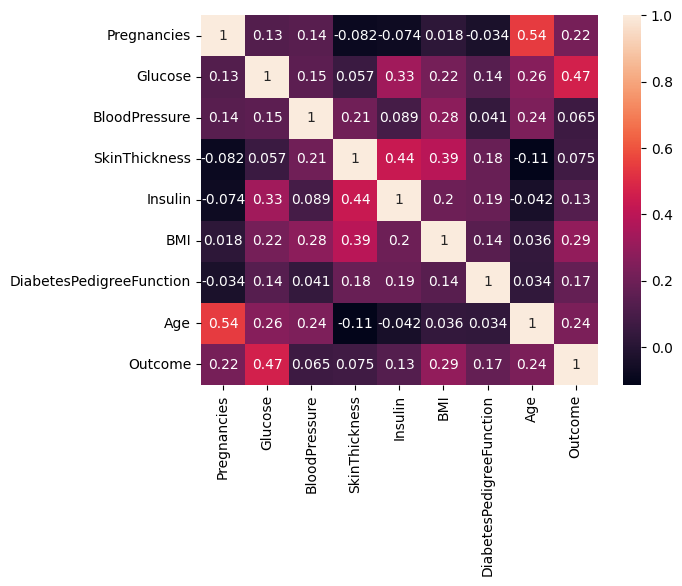

In [11]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)

Terlihat korelasi yang cukup tinggi antara SkinThickness dan Insulin pada 44% serta korelasi Age dengan Pregnancies yaitu 54%.

<Axes: xlabel='Pregnancies', ylabel='count'>

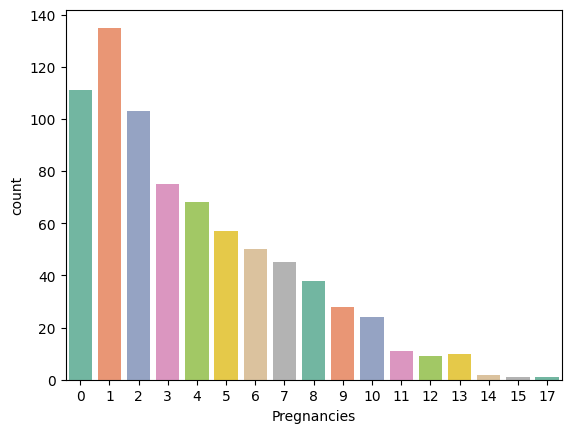

In [12]:
sns.countplot(x = 'Pregnancies', palette = 'Set2', data = df)

Kita bisa melihat dari bar plot diatas terdapat beberapa orang yang pernah mengalami kehamilan sebanyak 17 kali, dan mayoritasnya pernah hamil satu kali.

<Axes: xlabel='Outcome', ylabel='count'>

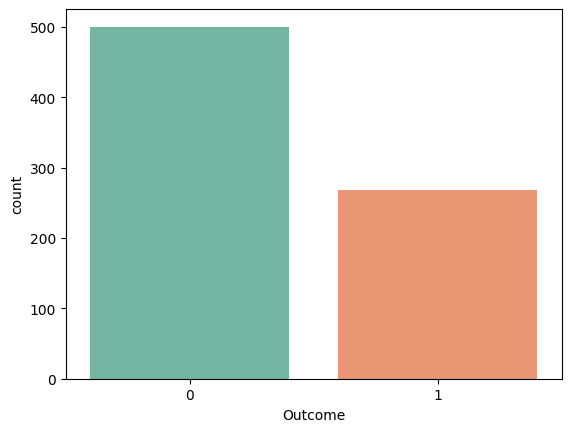

In [13]:
sns.countplot(x = 'Outcome', palette = 'Set2', data = df)

Data Outcome(hasil) cenderung menunjukkan hasil 0 atau tidak memiliki diabetes. Hampir setengahnya merupakan orang yang memiliki diabetes.

<Axes: xlabel='Glucose'>

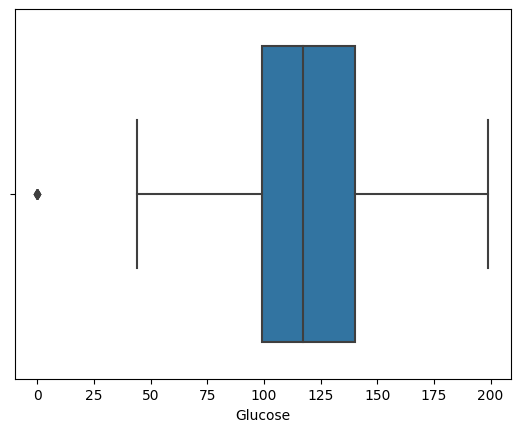

In [14]:
sns.boxplot(x=df["Glucose"])

Kita bisa melihat pada kolom Glucose terdapat data outlier dengan nilai 0. Dan rata-rata nilai Glucose ini berada di kisaran 100 hingga 140an.

<Axes: xlabel='BloodPressure'>

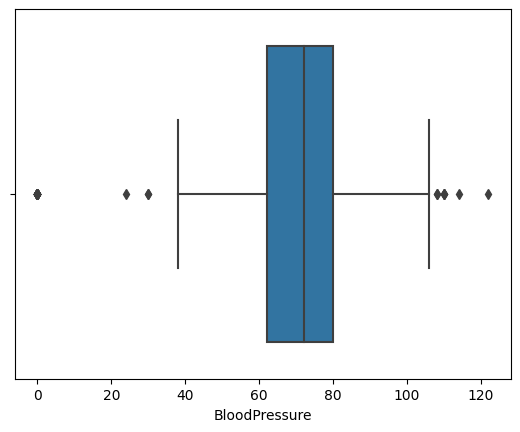

In [15]:
sns.boxplot(x=df["BloodPressure"])

Diatas merupakan box plot dari kolom BloodPressure, Rata-rata nilai BloodPressurenya adalah 60 hingga 80.

<Axes: xlabel='Pregnancies', ylabel='count'>

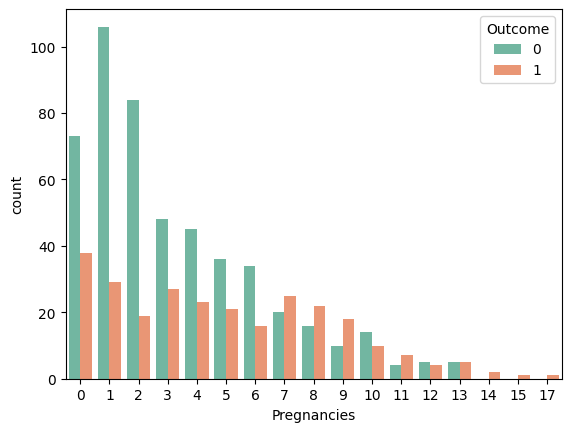

In [16]:
sns.countplot(x = 'Pregnancies', hue = 'Outcome', palette = 'Set2', data = df)

Kita bisa lihat diatas korelasi antara kolom Outcome dengan pregnancies. Dimana jumlah Pregnancies kemungkinan besar mempengaruhi hasil Outcome diabetes.

Kita akan lanjut ke tahap selanjutnya, yaitu Data Processing.

#Data Processing

Langkah pertama saya adalah memasukkan fitur-fitur dan target pada variablenya.

In [17]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

Lalu saya akan menggunakan RandomOverSampler untuk mengisi jumlah baris data agar nilai outcomenya balance/seimbang antara 1 dan 0.

In [18]:
ros = RandomOverSampler(random_state=0)

In [19]:
X, y = ros.fit_resample(X, y)

In [20]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Kita juga akan menggunakan StandardScaler agar nilai-nilai pada setiap kolom memiliki nilai mean 0.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

Dan yang terakhir saya akan melakukan split data dengan nilai testnya 30% dari data dan sisanya dimasukkan pada training.

In [22]:
df.to_csv('data.csv', index=False)

#Modeling

Disini saya akan melakukan tahap modeling dengan menggunakan KNeighborsClassifier.

In [ ]:
knn = KNeighborsClassifier()

Saya akan mencari nilai n_neighbor yang terbaik untuk datasets ini.

In [ ]:
k_list = list(range(4,12))

In [ ]:
k_values = dict(n_neighbors = k_list)

In [ ]:
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')

In [ ]:
grid.fit(X_train, y_train)
GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 11]},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 11]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 9}, 0.73)

Bisa dilihat dari hasil diatas bahwa n_neighbors terbaik adalah 9 dengan score 73%. Mari kita gunakan nilai 9.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       156
           1       0.76      0.81      0.78       144

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



Tampaknya bagus, score yang didapatkan dari classification report adalah 78%, lebih tinggi dibanding menggunakan gridsearchcv.

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[119,  37],
       [ 28, 116]])

Diatas adalah hasil confusion matrixnya, dan menurut saya itu sudah cukup baik.

#Visualisasi KNN

In [ ]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(data, k):
 x = data[['Pregnancies','BloodPressure']].values
 y = data['Outcome'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)

# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)

# Adding axes annotations
 plt.xlabel('Pregnancies')
 plt.ylabel('BloodPressure')
 plt.title('Knn dengan K='+ str(k))
 plt.show()

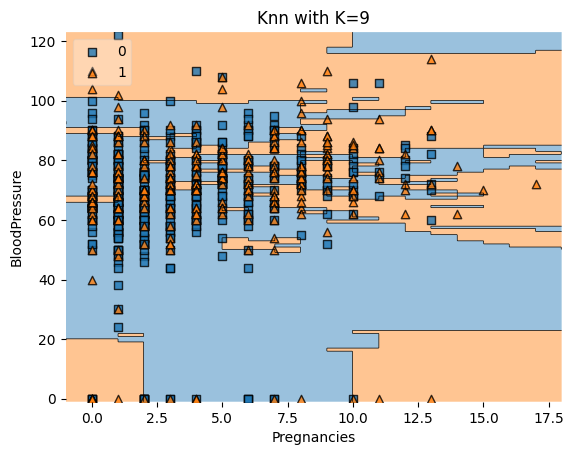

In [ ]:
knn_comparison(df, 9)

Diatas merupakan visualisasi knn antara Pregnancies dengan BloodPressure.

#Export dengan pickle

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(knn, f)